<a href="https://colab.research.google.com/github/danielsyahputra13/face-mask-detection/blob/master/notebooks/Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Mask Detection

## Import Libraries and Data

In [ ]:
!pip install --upgrade --no-cache-dir gdown

import zipfile
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!git clone https://github.com/prajnasb/observations

fatal: destination path 'observations' already exists and is not an empty directory.


In [ ]:
SOURCE_PATH = "/content/observations/experiements/dest_folder"
TRAIN_DIR = os.path.join(SOURCE_PATH, "train")
VAL_DIR = os.path.join(SOURCE_PATH, "val")

## EDA

In [ ]:
TRAIN_MASK_DIR = os.path.join(TRAIN_DIR, "with_mask")
TRAIN_WITHOUT_MASK_DIR = os.path.join(TRAIN_DIR, "without_mask")
VAL_MASK_DIR = os.path.join(VAL_DIR, 'with_mask')
VAL_WITHOUG_MASK_DIR = os.path.join(VAL_DIR, 'without_mask')

In [ ]:
print(f"There are {len(os.listdir(TRAIN_MASK_DIR))} images of with facemask for training")
print(f"There are {len(os.listdir(TRAIN_WITHOUT_MASK_DIR))} images of without facemask for training")
print(f"There are {len(os.listdir(VAL_MASK_DIR))} images of with facemask for validation")
print(f"There are {len(os.listdir(VAL_WITHOUG_MASK_DIR))} images of without facemask for training")

There are 658 images of with facemask for training
There are 657 images of without facemask for training
There are 71 images of with facemask for validation
There are 71 images of without facemask for training


## Training

In [ ]:
def train_val_generators(TRAIN_DIR, VAL_DIR):
  train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')
  
  train_generator = train_datagen.flow_from_directory(directory=TRAIN_DIR,
                                                      batch_size=32,
                                                      class_mode='categorical',
                                                      target_size=(150, 150))
  
  validation_datagen = ImageDataGenerator(rescale=1./255,
                                          rotation_range=40,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True,
                                          fill_mode='nearest')

  validation_generator = validation_datagen.flow_from_directory(directory=VAL_DIR,
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                target_size=(150, 150))
  return train_generator, validation_generator

In [ ]:
train_generator, validation_generator = train_val_generators(TRAIN_DIR, VAL_DIR)

Found 1315 images belonging to 2 classes.
Found 142 images belonging to 2 classes.


In [ ]:
def create_model():
  model = tf.keras.models.Sequential([ 
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      # Deep Neural Networks
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(2, activation='softmax')
  ])

  
  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy']) 
    
  return model

In [ ]:
model = create_model()

history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/15
42/42 [==============================] - 60s 1s/step - loss: 0.7810 - accuracy: 0.5247 - val_loss: 0.6086 - val_accuracy: 0.6972
Epoch 2/15
42/42 [==============================] - 58s 1s/step - loss: 0.4557 - accuracy: 0.7901 - val_loss: 0.3195 - val_accuracy: 0.8732
Epoch 3/15
42/42 [==============================] - 58s 1s/step - loss: 0.3172 - accuracy: 0.8875 - val_loss: 0.2181 - val_accuracy: 0.8803
Epoch 4/15
42/42 [==============================] - 58s 1s/step - loss: 0.2707 - accuracy: 0.8981 - val_loss: 0.1362 - val_accuracy: 0.9648
Epoch 5/15
42/42 [==============================] - 58s 1s/step - loss: 0.2245 - accuracy: 0.9171 - val_loss: 0.1250 - val_accuracy: 0.9859
Epoch 6/15
42/42 [==============================] - 58s 1s/step - loss: 0.2089 - accuracy: 0.9217 - val_loss: 0.1051 - val_accuracy: 0.9718
Epoch 7/15
42/42 [==============================] - 58s 1s/step - loss: 0.2039 - accuracy: 0.9202 - val_loss: 0.2369 - val_accuracy: 0.9014
Epoch 8/15
42/42 [==

In [ ]:
def plot_history(history):
  #-----------------------------------------------------------
  # Retrieve a list of list results on training and test data
  # sets for each training epoch
  #-----------------------------------------------------------
  acc=history.history['accuracy']
  val_acc=history.history['val_accuracy']
  loss=history.history['loss']
  val_loss=history.history['val_loss']

  epochs=range(len(acc)) # Get number of epochs

  #------------------------------------------------
  # Plot training and validation accuracy per epoch
  #------------------------------------------------
  plt.plot(epochs, acc, 'r', "Training Accuracy")
  plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
  plt.title('Training and validation accuracy')
  plt.show()
  print("")

  #------------------------------------------------
  # Plot training and validation loss per epoch
  #------------------------------------------------
  plt.plot(epochs, loss, 'r', "Training Loss")
  plt.plot(epochs, val_loss, 'b', "Validation Loss")
  plt.show()

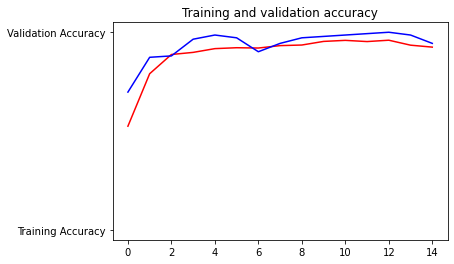

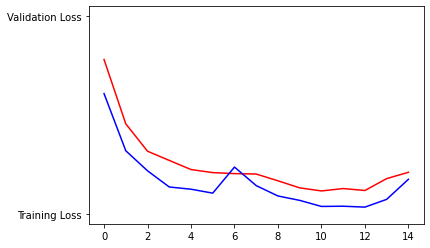

In [ ]:
plot_history(history)

In [ ]:
model.save("facemask_model.h5")

In [ ]:
model = tf.keras.models.load_model("facemask_model.h5")

In [ ]:
model.predict(validation_generator)

array([[9.9999988e-01, 1.3662101e-07],
       [6.7973059e-07, 9.9999928e-01],
       [1.0780492e-06, 9.9999893e-01],
       [8.6272288e-05, 9.9991369e-01],
       [5.9076356e-06, 9.9999404e-01],
       [9.9999785e-01, 2.1326834e-06],
       [4.7304334e-06, 9.9999523e-01],
       [8.7096829e-05, 9.9991286e-01],
       [6.1952737e-03, 9.9380469e-01],
       [6.3137621e-01, 3.6862379e-01],
       [6.3086907e-07, 9.9999940e-01],
       [9.9515945e-01, 4.8405742e-03],
       [3.7522019e-05, 9.9996245e-01],
       [4.9570512e-02, 9.5042956e-01],
       [1.8462142e-06, 9.9999821e-01],
       [3.2846088e-04, 9.9967158e-01],
       [6.6977873e-02, 9.3302214e-01],
       [8.4803520e-07, 9.9999917e-01],
       [9.9918598e-01, 8.1397296e-04],
       [9.9999607e-01, 3.9818897e-06],
       [8.0296510e-01, 1.9703491e-01],
       [2.9628742e-07, 9.9999976e-01],
       [9.9633431e-01, 3.6656971e-03],
       [9.9479067e-01, 5.2093808e-03],
       [9.9960822e-01, 3.9180045e-04],
       [9.9999750e-01, 2.